<a href="https://www.kaggle.com/code/mikedelong/python-moon-maps?scriptVersionId=141003380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
object_df = pd.read_csv(filepath_or_buffer='/kaggle/input/list-of-artificial-objects-on-the-moon/List of Artificial Objects on the Moon.csv',
                       index_col=[0], nrows=88)
object_df['Mass (lb)'] = object_df['Mass (lb)'].apply(func=lambda x: int(x.replace('<', '').replace('>', '').replace(',', '')))
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Artificial object  88 non-null     object
 1   Country            88 non-null     object
 2   Year               88 non-null     int64 
 3   Mass (lb)          88 non-null     int64 
 4   Mass (kg)          88 non-null     object
 5   Status             88 non-null     object
 6   Location           87 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.5+ KB


We want to plot the data on a map, and the Location data is kind of messy with multiple issues.

In [2]:
import numpy as np
# now we can split our coordinates into latitude and longitude

char_map = {8242: 39, 8243: 34, 65279: 87}
def fix_domain(arg):
    if isinstance(arg, float): 
        return arg
    arg = [ord(char) for char in list(arg)]
    arg = [char if char not in char_map.keys() else char_map[char] for char in arg]
    result = ''.join([chr(char) for char in arg]).replace('WW', 'W').replace('EW', 'E')
    return result

def get_coord(arg, index):
    if not isinstance(arg, str):
        return arg
    if arg.startswith('Unk'):
        return np.nan
    if arg == 'na':
        return np.nan
    pieces = arg.split()
    if len(pieces) <= index:
        return np.nan
    return pieces[index].strip()

def get_dd(arg) -> float:
    if not isinstance(arg, str):
        return arg
    if arg == 'nan':
        return np.nan
    multiplier = -1 if arg[-1] in {'S', 'W'} else 1
    pieces = arg[:-1].replace('°', ' ').replace('\'', ' ').replace('\"', ' ').split()
    return multiplier * sum([float(piece)/pow(60, index) for index, piece in enumerate(pieces)])

object_df['location'] = object_df['Location'].apply(func=lambda x: str(x).split('/')[0])
object_df['latitude_str'] = object_df['location'].apply(func=get_coord, args=(0, ))
object_df['longitude_str'] = object_df['location'].apply(func=get_coord, args=(1, ))
object_df['latitude'] = object_df['latitude_str'].apply(func=fix_domain).apply(func=get_dd)
object_df['longitude'] = object_df['longitude_str'].apply(func=fix_domain).apply(func=get_dd)

object_df.head(n=5)

,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location,location,latitude_str,longitude_str,latitude,longitude
0,Luna 2,Soviet Union,1959,860,390,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,29°06′N 0°00′E﻿,29°06′N,0°00′E﻿,29.100000,0.00
1,Luna 2 Third stage of Vostok rocket,Soviet Union,1959,20100,9100,Intentionally crashed,29°06′N 0°00′E﻿ / ﻿29.1°N 0°E,29°06′N 0°00′E﻿,29°06′N,0°00′E﻿,29.100000,0.00
2,Ranger 4,United States,1962,730,331,Intentionally crashed,15°30′S 130°42′W﻿ / ﻿15.5°S 130.7°W,15°30′S 130°42′W﻿,15°30′S,130°42′W﻿,-15.500000,-130.70
3,Ranger 6,United States,1964,840,381,Intentionally crashed,9°21′29″N 21°28′48″E﻿ / ﻿9.358°N 21.480°E,9°21′29″N 21°28′48″E﻿,9°21′29″N,21°28′48″E﻿,9.358056,21.48
4,Ranger 7,United States,1964,805,365,Intentionally crashed,10°38′S 20°36′W﻿ / ﻿10.63°S 20.60°W,10°38′S 20°36′W﻿,10°38′S,20°36′W﻿,-10.633333,-20.60


We can plot the locations as a scatterplot, but we don't have moon map data (and also there are no continents on the moon), so we don't have lots of visual reference points to make this view interesting.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='latitude', ylabel='longitude'>

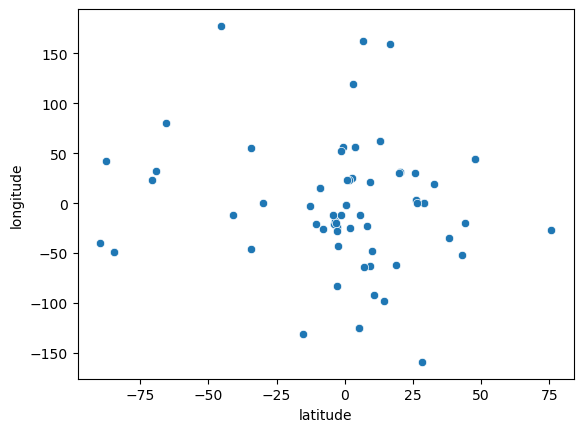

In [3]:
from seaborn import scatterplot
scatterplot(data=object_df, x='latitude', y='longitude')

But we can use the various columns to make a richer view with a plotly scatter.

In [4]:
from plotly.express import scatter
scatter(
    data_frame=object_df, 
    x='latitude', 
    y='longitude', 
    color='Mass (lb)', 
    hover_name='Artificial object', 
    hover_data={'Status', 'Year'},
    symbol='Country',
    color_continuous_scale='Blues_r',
).update_layout(legend_orientation='h').show()

<Axes: ylabel='Frequency'>

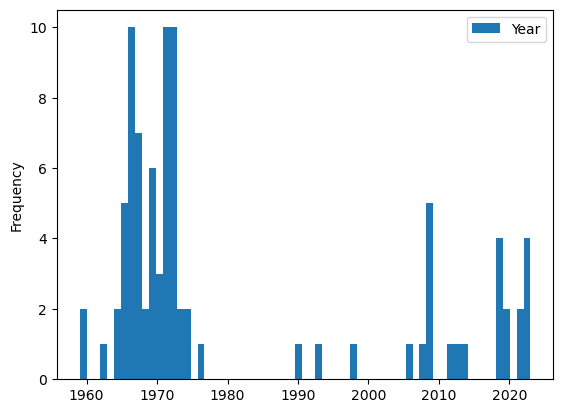

In [5]:
object_df['Year'].plot.hist(bins=1 + object_df['Year'].max() - object_df['Year'].min(), legend=True)

<Axes: ylabel='Frequency'>

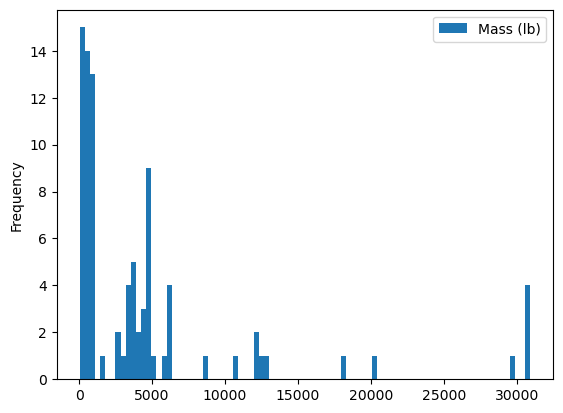

In [6]:
object_df['Mass (lb)'].plot.hist(bins=88, legend=True)

In [7]:
object_df['Mass (kg)'].values

array(['390', '9100', '331', '381', '365', '1474', '1504', '100', '367',
       '367', '100', '1600', '1640', '1670', '270', '113', '386', '292',
       '385', '386', '281', '386', '283', '104', '386', '281', '282',
       '290', '1670', '2211', '2034', '2718', '2184', '221', '2164',
       '1380', '5600', '13454', '1880', '1880', '14016', '2144', '2132',
       '14036', '2809', '210', '2132', '36', '<5,727', '14002', '2765',
       '210', '2138', '36', '13960', '2798', '210', '2150', '4850', '328',
       '4000', '5600', '<5,800', '12', '143', '126', '307', '35', '53',
       '2000', '1,984[76]', '700', '2270', '133', '1200', '248', '1200',
       '150', '47', '1471', '<8,200', '>882', '2800', '14', '340', '340',
       '1750', '1752'], dtype=object)

We don't need both pounds and kilograms, do we? 

In [8]:
# every other row is garbage so we drop them
mission_df = pd.read_csv(filepath_or_buffer='/kaggle/input/list-of-artificial-objects-on-the-moon/Missions by date.csv', index_col=[0]).iloc[::2]
mission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 338
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mission         170 non-null    object
 1   Spacecraft      170 non-null    object
 2   Launch date     170 non-null    object
 3   Carrier rocket  170 non-null    object
 4   Operator        170 non-null    object
 5   Mission type    170 non-null    object
 6   Outcome         98 non-null     object
dtypes: object(7)
memory usage: 10.6+ KB


In [9]:
mission_df.head(n=10)

,Mission,Spacecraft,Launch date,Carrier rocket,Operator,Mission type,Outcome
0,Pioneer 0 (Able I)[3],Pioneer 0,17 August 1958,Thor DM-18 Able I[3],USAF,Orbiter,NaN
2,Luna E-1 No.1,Luna E-1 No.1,23 September 1958,Luna,OKB-1,Impactor,NaN
4,Pioneer 1 (Able II)[3],Pioneer 1,11 October 1958,Thor DM-18 Able I[3],NASA,Orbiter,NaN
6,Luna E-1 No.2,Luna E-1 No.2,11 October 1958,Luna,OKB-1,Impactor,NaN
8,Pioneer 2 (Able III),Pioneer 2,8 November 1958,Thor DM-18 Able I,NASA,Orbiter,NaN
10,Luna E-1 No.3,Luna E-1 No.3,4 December 1958,Luna,OKB-1,Impactor,NaN
12,Pioneer 3,Pioneer 3,6 December 1958,Juno II,NASA,Flyby,NaN
14,Luna 1 (E-1 No.4),Luna 1,2 January 1959,Luna,OKB-1,Impactor,NaN
16,Pioneer 4,Pioneer 4,3 March 1959,Juno II,NASA,Flyby,NaN
18,E-1A No.1,E-1A No.1,18 June 1959,Luna,OKB-1,Impactor,NaN


In [10]:
mission_df['Operator'].value_counts()

NASA                                                                                                                                                                                                                    33
Lavochkin                                                                                                                                                                                                               16
OKB-1                                                                                                                                                                                                                   12
CNSA                                                                                                                                                                                                                     7
ISRO                                                                                                                        

This data is really messy.